In [33]:
# imports
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.ensemble import RandomForestRegressor


%matplotlib inline
plt.style.use('classic')

%matplotlib inline

In [3]:
x = np.load('/home/cajanond/Documents/omdena/GPSDD-Food-Security-Senegal/data/external/x_scaled.npy')
gt = np.load('/home/cajanond/Documents/omdena/GPSDD-Food-Security-Senegal/data/external/gt.npy')

In [4]:
from keras.preprocessing import sequence
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

from keras.optimizers import Adam
from keras.models import load_model
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


In [9]:
x = np.nan_to_num(x, nan=0)

In [28]:
train = x[:200,:,:]
train_target = gt[:200]

validation = x[200:280,:,:]
validation_target = gt[200:280]

In [11]:
train


array([[[ 0.        ,  0.04182524, -0.86013969, ..., -0.81659395,
          0.74953037, -0.9955823 ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          1.        , -1.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.97319975, -0.81507592],
        ...,
        [ 0.        ,  0.71482894,  1.        , ...,  0.17903889,
          0.72273012, -0.92628222],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.72273012, -0.96756913],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.72273012, -0.96756913]],

       [[ 0.        ,  0.04182524, -0.86013969, ..., -0.81659395,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          1.        , -1.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          1.        , -0.75997093],
        ...,
        [ 0.        ,  0.71482894,  1.        , ...,  

In [29]:
model = Sequential()
model.add(LSTM(126, input_shape=(36, 12)))
model.add(Dense(1, activation='linear'))

model.summary()

adam = Adam(lr=0.001)
chk = ModelCheckpoint('best_model.pkl',
                      monitor='val_acc',
                      save_best_only=True,
                      mode='max',
                      verbose=0)
model.compile(loss=tf.keras.losses.MeanSquaredError(),
              optimizer=adam,
              metrics=[tf.keras.losses.MeanSquaredError()])
history = model.fit(train,
                      train_target,
                      epochs=100,
                      batch_size=1,
                      callbacks=[chk],
                      validation_data=(validation,validation_target))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 126)               70056     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 127       
Total params: 70,183
Trainable params: 70,183
Non-trainable params: 0
_________________________________________________________________
Train on 200 samples, validate on 80 samples
Epoch 1/100
200/200 [==============================] - 2s 10ms/step - loss: 0.2098 - mean_squared_error: 0.2098 - val_loss: 0.1216 - val_mean_squared_error: 0.121
Epoch 2/100
200/200 [==============================] - 1s 7ms/step - loss: 0.0592 - mean_squared_error: 0.0592 - val_loss: 0.1125 - val_mean_squared_error: 0.11
Epoch 3/100
200/200 [==============================] - 2s 8ms/step - loss: 0.0583 - mean_squared_error: 0.0583 - val_loss: 0.0379 - val_mean_sq

/home/cajanond/anaconda3/envs/omdena_base/lib/python3.7/site-packages/keras/callbacks/callbacks.py:707: RuntimeWarning: Can save best model only with val_acc available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


dict_keys(['val_loss', 'val_mean_squared_error', 'loss', 'mean_squared_error'])


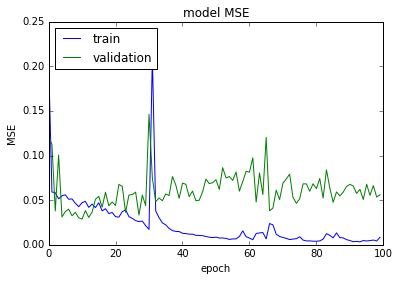

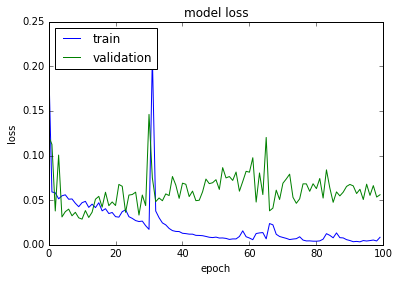

In [34]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('model MSE')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [20]:
validation_target[0]

1.6599940546634435

In [21]:
history.model.predict(validation)

array([[1.1998404],
       [1.8129481],
       [1.5627602],
       [1.3147056],
       [1.4329282],
       [1.3162189],
       [1.219252 ],
       [1.1929874],
       [1.1314093],
       [1.198275 ],
       [1.2194244],
       [1.4300214],
       [1.4374312],
       [1.250591 ],
       [1.3646423],
       [1.438284 ],
       [1.3857632],
       [1.5111343],
       [1.1757632],
       [1.3958876],
       [1.7092086],
       [1.3385767],
       [1.3880204],
       [1.2395382],
       [1.2395382],
       [1.150771 ],
       [1.6269745],
       [1.6296195],
       [1.4145087],
       [1.1555351],
       [1.3908964],
       [1.3960811],
       [1.2412727],
       [1.4762344],
       [1.2231725],
       [1.1166216],
       [1.1538327],
       [1.2410637],
       [1.21967  ],
       [1.2513996],
       [1.3418325],
       [1.2706478],
       [1.2870575],
       [1.260744 ],
       [1.4585024],
       [1.4731117],
       [1.3081048],
       [1.3264612],
       [1.2703267],
       [1.1924151],


In [22]:
validation_target

array([1.65999405e+000, 1.18999990e+000, 1.15000007e+000, 1.14000039e+000,
       1.14999390e+000, 1.21003579e+000, 1.10999848e+000, 1.18999587e+000,
       1.24999729e+000, 1.42001333e+000, 1.19999940e+000, 1.25000085e+000,
       1.23998747e+000, 1.16999960e+000, 1.24000101e+000, 1.16000108e+000,
       1.12000015e+000, 1.26000222e+000, 1.09999556e+000, 1.50000806e+000,
       1.25000076e+000, 1.27999778e+000, 1.29000303e+000, 1.36001360e+000,
       1.64000743e+000, 1.10000070e+000, 1.18999907e+000, 1.14001975e+000,
       1.20999873e+000, 1.16999749e+000, 1.15999864e+000, 1.20000093e+000,
       1.22999726e+000, 1.12999937e+000, 1.18999760e+000, 1.11000047e+000,
       1.22999919e+000, 1.18000166e+000, 1.14000013e+000, 1.15999790e+000,
       1.34000691e+000, 1.42998348e+000, 1.16999811e+000, 1.14500050e+000,
       1.08000031e+000, 1.17000494e+000, 1.11999934e+000, 1.10000000e+000,
       1.18000828e+000, 1.16999989e+000, 1.21999717e+000, 1.23000184e+000,
       1.31000272e+000, 1

In [ ]:
chk.model.predict(validation)

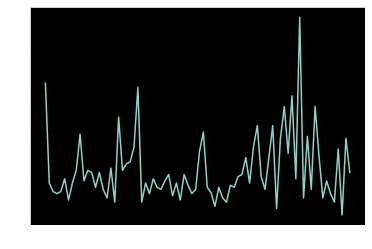

In [27]:
plt.plot(validation_target[:80])